In [9]:
# DELETE BEFORE PUBLISHING
# This is just here so you can preview the styling on your local machine

from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill  {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")

<div class="usecase-title">{Melbourne's Liveability Assessment}</div>

<div class="usecase-authors"><b>Authored by: </b> {Steven Nguyen}</div>

<div class="usecase-duration"><b>Duration:</b> {120} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>{Python, Data Wrangling, Scikit-Learn, Matplotlib}</div>
</div>

<div class="usecase-section-header">Scenario</div>

**As a council it is important that we're focusing on our residents and ensuring that the City of Melbourne continues to have a high liveability. As such, we are dedicated to looking at the trends in our liveability and reflecting on why certain trends have decreased and why. We endeavour to ensure we know how our liveability is trending and find resolutions to why they are decreasing.**

This project will endeavour to highlight key trends for the City of Melbourne in regards to liveability and ensure that COM remains a highly liveable city and continues to retain its high ranking for liveability internationally. Downwards trends will be further investigated to potentially highlight areas that could be remedied and thus prevent further downwards trend. This will be achieved through looking at COM's *Indicators of Wellbeing by Year* and *Liveability and Social Indicators* datasets.{Using User Story format, write a description of the problem you are trying to solve for this use case.}

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
<ul>
    <li>Learn how to import the datasets into a Pandas dataframe</li>
    <li>Data wrangling with any columns not required and aggregating data</li>
    <li>Learn how to visualise by utilising libraries such as Matplotlib, Seaborn, Geopandas and Folium</li>
</ul>

<h1><div class="usecase-section-header">Introduction</div></h1>

Historically, Melbourne enjoyed the distinction of occupying the foremost position in the Global Liveability Ranking until the year 2018. Nevertheless, in the subsequent years, the city has encountered noteworthy challenges in its quest to regain this prestigious ranking. This particular use case is centered on a comprehensive examination of the dynamic trends pertaining to liveability within Melbourne. Our primary aim is to discern and elucidate the determinants that have hindered Melbourne's endeavor to recapture the coveted number one position in the Global Liveability Ranking.

Our analysis will focus on pivotal domains that significantly contribute to the overall liveability score, encompassing areas such as employment opportunities, food security, acesss to healthcare, safety and security, as well as access to natural amenities. Furthermore, we will delve into the perspectives of Melbourne's residents, seeking insights through the Wellness Survey as an indicator. By juxtaposing these subjective views with objective metrics like the Jobs-to-Housing ratio, we intend to gain a nuanced understanding of the facets of liveability that warrant attention and potential enhancement.

**Datasets List**
<ol>
<li>Indicators of Wellbeing by Year Future Melbourne</li>
<li>City of Melbourne Liveability and Social Indicators</li>
</ol>

**Contents**
<ol>
<li>Import libraries</li>
<li>Analysis</li>
2.1. Access to Jobs <br>
2.2. Healthcare<br>
2.3. Food <br>
2.4. Safety<br>
2.5. Nature<br>
<li>Findings & Discussion</li>
<li>Conclusion</li>
</ol>

Firstly, we'll import the necessary packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.linear_model import LinearRegression
import matplotlib.dates as dates
import folium
plt.style.use('ggplot')


We'll then be importing the 2 datasets that we'll be looking at.
1. Indicators of Wellbeing by Year Future Melbourne
2. City of Melbourne Liveability and Social Indicators

In [3]:
#https://data.melbourne.vic.gov.au/explore/dataset/indicators-of-wellbeing-by-year-future-melbourne/table/
ind_wellbeing = pd.read_csv("https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/indicators-of-wellbeing-by-year-future-melbourne/exports/csv?delimiter=%3B&list_separator=%2C&quote_all=false&with_bom=true",delimiter=";")

#https://data.melbourne.vic.gov.au/explore/dataset/city-of-melbourne-liveability-and-social-indicators/information/
liveability_df = pd.read_csv("https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/city-of-melbourne-liveability-and-social-indicators/exports/csv?delimiter=%3B&list_separator=%2C&quote_all=false&with_bom=true",delimiter=";")

Let us briefly look into both datasets to get a general understanding of them

In [13]:
#print the head of the dataframe indicators of wellbeing dataset 
ind_wellbeing.head()

,indicator_label,indicator_description,unit,2012,2013,2014,2015,2016,population,source
0,Quality of life,Personal subjective wellbeing Index (average o...,%,75.6,76.7,76.8,76.9,76.5,Resident,Future Melbourne Social Survey
1,Quality of life (Male),Personal subjective wellbeing Index (average o...,%,75.6,76.7,77.4,76.6,75.9,Resident,Future Melbourne Social Survey
2,Quality of life (18-35 yrs),Personal subjective wellbeing Index (average o...,%,75.6,74.9,76.9,76.1,76.3,Resident,Future Melbourne Social Survey
3,Quality of life (36 yrs and over),Personal subjective wellbeing Index (average o...,%,75.5,78.3,76.8,77.6,76.6,Resident,Future Melbourne Social Survey
4,Personal relationships,How satisfied people feel with their personal ...,%,77.0,79.8,80.0,78.9,79.5,Resident,Future Melbourne Social Survey


In [15]:
#print the columns names for the dataframe indicators of wellbeing dataset 
ind_wellbeing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   indicator_label        88 non-null     object 
 1   indicator_description  88 non-null     object 
 2   unit                   88 non-null     object 
 3   2012                   65 non-null     float64
 4   2013                   65 non-null     float64
 5   2014                   88 non-null     float64
 6   2015                   88 non-null     float64
 7   2016                   88 non-null     float64
 8   population             88 non-null     object 
 9   source                 88 non-null     object 
dtypes: float64(5), object(5)
memory usage: 7.0+ KB


In [6]:
#print the head of the dataframe for the Liveability and Social indicator dataset
liveability_df.head()

,type,topic,id,indicator,period,numerator,denominator,value,value_type,sources
0,Liveability,Economy,ECO_1,City's unemployment rate,2015 (June Qtr),"3,942","84,942",4.64,Percentage,Australian Government Department of Employment...
1,Liveability,Economy,ECO_2,Assessed value of commercial and industrial pr...,2015 (at 30 June),"48,331,069,777.00","101,671,404,180.00",47.54,Percentage,"City of Melbourne, Property Services, 2015-2018"
2,Liveability,Economy,ECO_3,Percentage of city population living in poverty,2015,"13,177","136,872",9.63,Percentage,"Geografia, Relative Poverty and Employment Mea..."
3,Liveability,Economy,ECO_4,Percentage of persons (city population) in ful...,2017 (June Qtr),"68,722","159,141",43.18,Percentage,"Geografia, Relative Poverty and Employment Mea..."
4,Liveability,Economy,ECO_4,Percentage of persons (city population) in ful...,2014 (June Qtr),"55,359","127,975",43.26,Percentage,"Geografia, Relative Poverty and Employment Mea..."


In [ ]:
#print the column names of the dataframe for the Liveability and Social indicator dataset
liveability_df.info()

<h1>1. Access to Jobs</h1>

House/jobs ratio <br>
City's unemployment rate<br>
Youth unemployment rate<br>
Number of new businesses<br>

In [4]:
#REC_5 = Jobs/House Ratio
REC_5 = liveability_df[liveability_df["id"] == "REC_5"]
REC_5 = REC_5.sort_values(by=["period"])

#ECO_1 = City's unemployment rate
ECO_1 = liveability_df[liveability_df["id"] == "ECO_1"]
ECO_1 = ECO_1.sort_values(by=["period"])

#ECO_5 = Youth unemployment rate
ECO_5 = liveability_df[liveability_df["id"] == "ECO_5"]
ECO_5 = ECO_5.sort_values(by=["period"])

#ECO_6 = Number of new businesses
ECO_6 = liveability_df[liveability_df["id"] == "ECO_6"]
ECO_6 = ECO_6.sort_values(by=["period"])

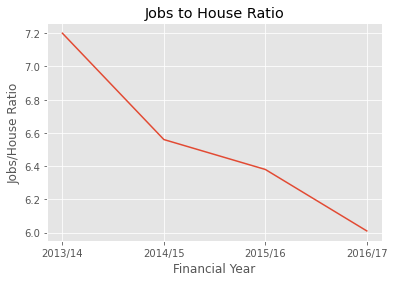

In [7]:
plt.plot(REC_5["period"],REC_5["value"])
plt.title("Jobs to House Ratio")
plt.xlabel("Financial Year")
plt.ylabel("Jobs/House Ratio")
plt.show()

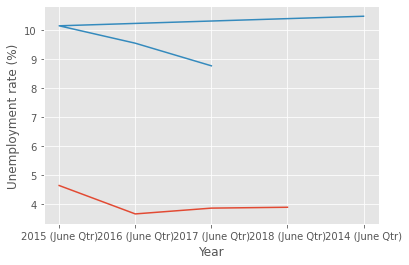

In [14]:
plt.plot(ECO_1["period"],ECO_1["value"],label= "City's unemployment")
plt.plot(ECO_5["period"],ECO_5["value"],label="Youth unemployment")
plt.xlabel("Year")
plt.ylabel("Unemployment rate (%)")
plt.show()

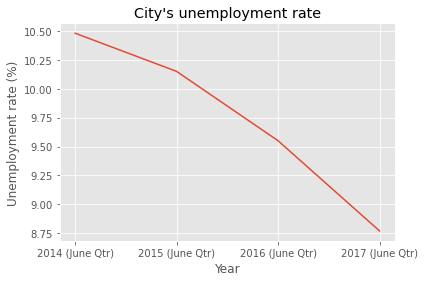

In [11]:
plt.plot(ECO_5["period"],ECO_5["value"])
plt.title("City's unemployment rate")
plt.xlabel("Year")
plt.ylabel("Unemployment rate (%)")
plt.show()

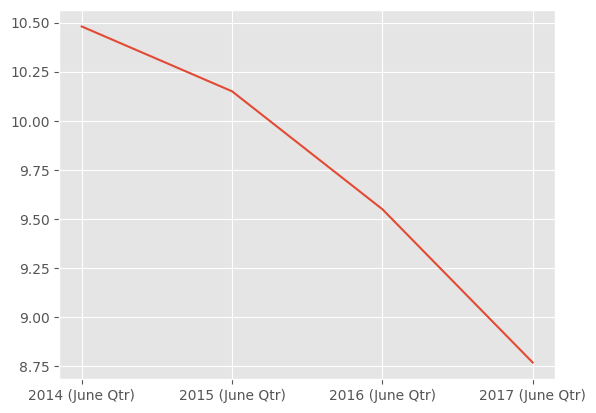

In [10]:
plt.plot(ECO_5["period"],ECO_5["value"])
plt.show()



2. Access to Healthcare

In [ ]:
ind_wellbeing.head()

,indicator_label,indicator_description,unit,2012,2013,2014,2015,2016,population,source
0,Health,How satisfied people feel with their health (a...,%,77.9,78.9,78.4,77.2,78.6,Resident,Future Melbourne Social Survey
1,Currently achieving in life,How satisfied people feel with what people are...,%,73.5,74.8,74.3,74.6,75.1,Resident,Future Melbourne Social Survey
2,Personal relationships (Male),How satisfied people feel with their personal ...,%,76.2,78.4,81.6,78.1,77.4,Resident,Future Melbourne Social Survey
3,Community connectedness,How satisfied people are with feeling part of ...,%,67.4,68.4,70.4,70.7,68.9,Resident,Future Melbourne Social Survey
4,Community connectedness (Male),How satisfied people are with feeling part of ...,%,66.9,69.1,69.5,70.6,67.6,Resident,Future Melbourne Social Survey


In [ ]:
health_df = ind_wellbeing[ind_wellbeing["indicator_label"] == "Health"]
quality_male = ind_wellbeing[ind_wellbeing["indicator_label"] == "Quality of life (Male)"]
quality_female = ind_wellbeing[ind_wellbeing["indicator_label"] == "Quality of life (Female)"]

In [ ]:
quality_male = pd.melt(quality_male, id_vars=['indicator_label'],var_name='Year',value_name="Value")
quality_male = quality_male.loc[2:6]

health_df = pd.melt(health_df, id_vars=['indicator_label'],var_name='Year',value_name="Value")
health_df = health_df.loc[2:6]

quality_female = pd.melt(quality_female, id_vars=['indicator_label'],var_name='Year',value_name="Value")
quality_female = quality_female.loc[2:6]



In [ ]:
health_df

,indicator_label,Year,Value
2,Health,2012,77.9
3,Health,2013,78.9
4,Health,2014,78.4
5,Health,2015,77.2
6,Health,2016,78.6


In [ ]:
health_df['Year'] = pd.to_datetime(health_df['Year'], format='%Y')
health_df['Year'] = health_df['Year'].dt.strftime('%Y')
health_df['Year'] = health_df['Year'].astype(np.int64)
health_df

,indicator_label,Year,Value
2,Health,2012,77.9
3,Health,2013,78.9
4,Health,2014,78.4
5,Health,2015,77.2
6,Health,2016,78.6


In [ ]:
# Get values for the trend line analysis
x_dates = health_df['Year']
x_num = dates.date2num(x_dates)

In [ ]:
x_num

array([2.32870370e-08, 2.32986111e-08, 2.33101852e-08, 2.33217593e-08,
       2.33333333e-08])

In [ ]:
health_value = health_df['Value'].to_numpy().astype('float64')
health_value

array([77.9, 78.9, 78.4, 77.2, 78.6])

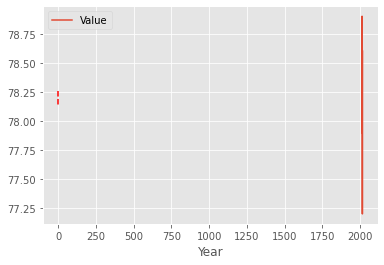

In [ ]:
x = dates.date2num(health_df['Year'])
y = health_df['Value']
z = np.polyfit(x, health_df['Value'].astype('float64'), 1)
p = np.poly1d(z)
#then the plot
health_df.plot('Year', 'Value')
plt.plot(x, p(x), "r--")


In [ ]:
print(dates.date2num(health_df['Year']))

[2.32870370e-08 2.32986111e-08 2.33101852e-08 2.33217593e-08
 2.33333333e-08]


In [ ]:
# Get values for the trend line analysis
x_dates = health_df['Year']
x_num = dates.date2num(x_dates)

# Calculate a fit line
trend = np.polyfit(x_num, health_value, 1)
fit = np.poly1d(trend)

plt.plot(x_dates, health_value)
plt.xlabel('Date')
plt.ylabel('Value')
plt.plot(x, p(x), "r--")
plt.show()

NameError: name 'health_value' is not defined

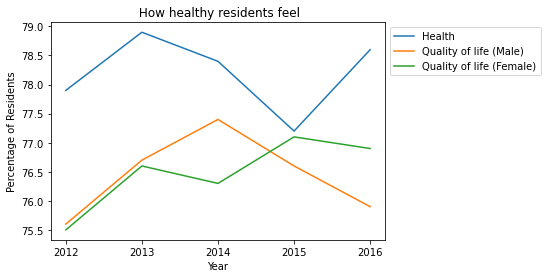

In [ ]:
plt.plot(health_df["Year"],health_df["Value"], label= 'Health')
plt.plot(quality_male["Year"],quality_male["Value"], label= "Quality of life (Male)")
plt.plot(quality_female["Year"],quality_female["Value"], label= "Quality of life (Female)")
plt.title(" How healthy residents feel")
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Year")
plt.ylabel("Percentage of Residents")
plt.show()

3. Food

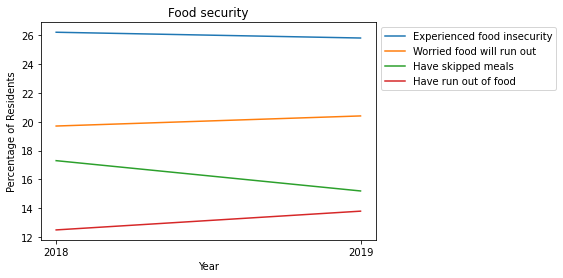

In [ ]:
FOOD_1 = livability_df[livability_df["id"] == "FOOD_1"]
FOOD_1 = FOOD_1.sort_values(by=["period"])

FOOD_2 = livability_df[livability_df["id"] == "FOOD_2"]
FOOD_2 = FOOD_2.sort_values(by=["period"])

FOOD_3 = livability_df[livability_df["id"] == "FOOD_3"]
FOOD_3 = FOOD_3.sort_values(by=["period"])

FOOD_4 = livability_df[livability_df["id"] == "FOOD_4"]
FOOD_4 = FOOD_4.sort_values(by=["period"])

plt.plot(FOOD_1["period"],FOOD_1["value"], label= 'Experienced food insecurity')
plt.plot(FOOD_2["period"],FOOD_2["value"], label= "Worried food will run out")
plt.plot(FOOD_3["period"],FOOD_3["value"], label= "Have skipped meals")
plt.plot(FOOD_4["period"],FOOD_4["value"], label= "Have run out of food")
plt.title("Food security")
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Year")
plt.ylabel("Percentage of Residents")
plt.show()

3. Greenspace

In [ ]:
tree_df = pd.read_csv("https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/tree-planting-zone-schedules-with-years-urban-forest/exports/csv?delimiter=%3B&list_separator=%2C&quote_all=false&with_bom=true",delimiter=";")

tree_geo = gpd.read_file("https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/tree-planting-zone-schedules-with-years-urban-forest/exports/geojson?limit=-1&timezone=UTC&use_labels=false&epsg=4326")

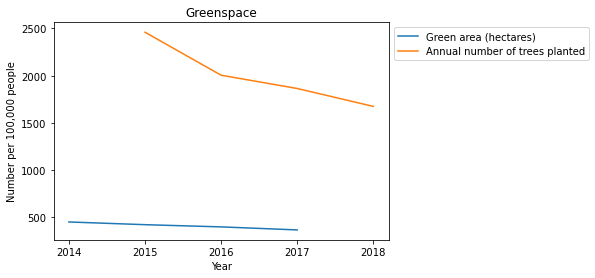

In [ ]:
REC_3 = livability_df[livability_df["id"] == "REC_3"]
REC_3 = REC_3.sort_values(by=["period"])

REC_4 = livability_df[livability_df["id"] == "REC_4"]
REC_4 = REC_4.sort_values(by=["period"])

plt.plot(REC_3["period"],REC_3["value"], label= 'Green area (hectares)')
plt.plot(REC_4["period"],REC_4["value"], label= "Annual number of trees planted")
plt.title("Greenspace")
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Year")
plt.ylabel("Number per 100,000 people")
plt.show()

In [ ]:
tree_df = pd.read_csv("https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/tree-planting-zone-schedules-with-years-urban-forest/exports/csv?delimiter=%3B&list_separator=%2C&quote_all=false&with_bom=true",delimiter=";")

tree_geo = gpd.read_file("https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/tree-planting-zone-schedules-with-years-urban-forest/exports/geojson?limit=-1&timezone=UTC&use_labels=false&epsg=4326")

In [ ]:
tree_geo.head()

,geo_point_2d,str_from,segpart,statusid,segid,streetname,streetid,schedule,mapstatus,str_to,segdescr,geometry
0,"{'lon': 144.9556797754683, 'lat': -37.81016073...",NaN,NaN,NaN,21529,NaN,NaN,Years 5 - 7,NaN,NaN,William Street between A'Beckett Street and Fr...,"MULTIPOLYGON (((144.95604 -37.81054, 144.95572..."
1,"{'lon': 144.94525513164808, 'lat': -37.8041218...",NaN,NaN,NaN,21009,NaN,NaN,Complete,NaN,NaN,Abbotsford Street between Victoria Street and ...,"MULTIPOLYGON (((144.94534 -37.80459, 144.94501..."
2,"{'lon': 144.9465088809808, 'lat': -37.79708155...",NaN,NaN,NaN,22516,NaN,NaN,Complete,NaN,NaN,Abbotsford Street between Wood Street and Cann...,"MULTIPOLYGON (((144.94641 -37.79669, 144.94674..."
3,"{'lon': 144.96855761243404, 'lat': -37.8236129...",NaN,NaN,NaN,22080,NaN,NaN,Years 8 - 10,NaN,NaN,Southbank Boulevard between St Kilda Road and ...,"MULTIPOLYGON (((144.96974 -37.82327, 144.96986..."
4,"{'lon': 144.98056707928617, 'lat': -37.8346162...",NaN,NaN,NaN,22258,NaN,NaN,Complete,NaN,NaN,Millswyn Street between Domain Road and St Mar...,"MULTIPOLYGON (((144.98064 -37.83475, 144.98054..."


In [ ]:
tree_geo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
tree_geo = tree_geo.to_crs(epsg=4326)


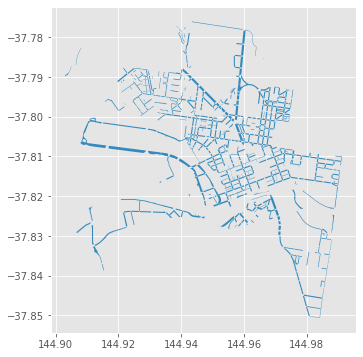

In [ ]:
tree_geo.plot(figsize=(6,6))
plt.show()

In [ ]:
for _, r in tree_geo.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "orange"})
    folium.Popup(r["BoroName"]).add_to(geo_j)
    geo_j.add_to(m)

KeyError: 'BoroName'

In [ ]:
m = folium.Map(location=[40.70, -73.94], zoom_start=10, tiles="CartoDB positron")
m

4. Community connectedness

5. Safety

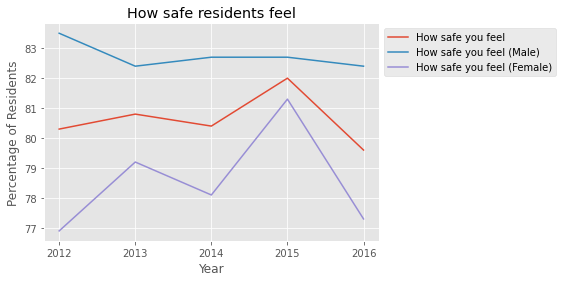

In [ ]:
safe_feel = ind_wellbeing[ind_wellbeing["indicator_label"] == "How safe you feel"]
safe_feel = pd.melt(safe_feel, id_vars=['indicator_label'],var_name='Year',value_name="Value")
safe_feel = safe_feel.loc[2:6]

safe_feel_male = ind_wellbeing[ind_wellbeing["indicator_label"] == "How safe you feel (Male)"]
safe_feel_male = pd.melt(safe_feel_male, id_vars=['indicator_label'],var_name='Year',value_name="Value")
safe_feel_male = safe_feel_male.loc[2:6]

safe_feel_female = ind_wellbeing[ind_wellbeing["indicator_label"] == "How safe you feel (Female)"]
safe_feel_female = pd.melt(safe_feel_female, id_vars=['indicator_label'],var_name='Year',value_name="Value")
safe_feel_female = safe_feel_female.loc[2:6]

plt.plot(safe_feel["Year"],safe_feel["Value"], label= 'How safe you feel')
plt.plot(safe_feel_male["Year"],safe_feel_male["Value"], label= 'How safe you feel (Male)')
plt.plot(safe_feel_female["Year"],safe_feel_female["Value"], label= 'How safe you feel (Female)')
plt.title("How safe residents feel")
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Year")
plt.ylabel("Percentage of Residents")
plt.show()

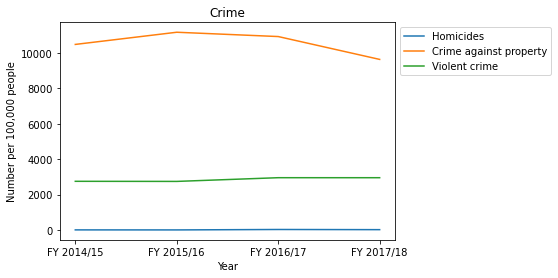

In [ ]:
FIRE_4 = livability_df[livability_df["id"] == "FIRE_4"]
FIRE_4 = FIRE_4.sort_values(by=["period"])

FIRE_5 = livability_df[livability_df["id"] == "FIRE_5"]
FIRE_5 = FIRE_5.sort_values(by=["period"])

FIRE_6 = livability_df[livability_df["id"] == "FIRE_6"]
FIRE_6 = FIRE_6.sort_values(by=["period"])

plt.plot(FIRE_4["period"],FIRE_4["value"], label= 'Homicides')
plt.plot(FIRE_5["period"],FIRE_5["value"], label= "Crime against property")
plt.plot(FIRE_6["period"],FIRE_6["value"], label= "Violent crime")
plt.title("Crime")
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Year")
plt.ylabel("Number per 100,000 people")
plt.show()

CHECK TREND LINES FOR KEY SOCIAL TRACKERS AND FOR NEGATIVE TREND LINES SEE HOW WE CAN RESOLVE THESE ISSUES.